In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh import plotting
from bokeh.io import output_notebook
from bokeh.models.mappers import LogColorMapper

In [2]:
from ukpgks import segy
from ukpgks import signal
output_notebook()

Loading BokehJS ...

In [3]:
obs9 = segy.read_segy('9.segy',coors=False)
obs63 = segy.read_segy('63.segy',coors=False)

print (obs9.shape,obs63.shape)

(800, 2001) (800, 2001)


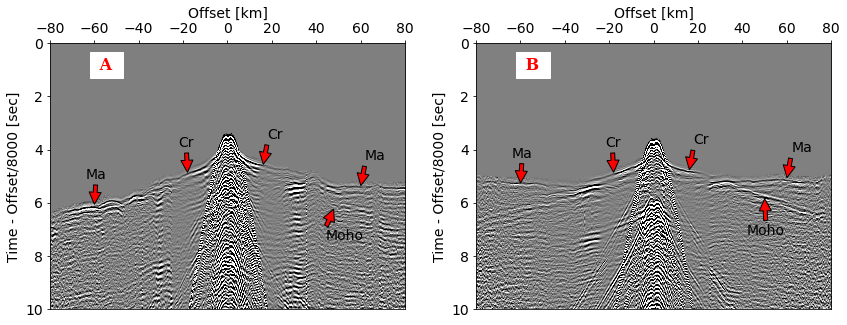

In [4]:
data = obs9[:,:1000]
aspect=12
extent=[-80,80,10,0]
output=True
cmap='gray'
size=(14,6)
name='data'
labels=[None,'Offset [km]','Time - Offset/8000 [sec]']
scale='no'
font = {'family': 'serif', 'color':  'red','weight': 'normal', 
        'size': 16, 'fontweight':'bold'}
plt.rcParams.update({'font.size': 14})
pclip = np.percentile(data,95)
fig,(ax,ax1) = plt.subplots(1,2,figsize=size)
im = ax.imshow(data.T,cmap=cmap,aspect=aspect,vmin=-pclip,vmax=pclip,extent=extent)
ax.set_title(labels[0])
ax.set_xlabel(labels[1])
ax.set_ylabel(labels[2])
if scale=='yes':
    fig.colorbar(im,pad=0.01)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticks_position('top')

ax.text(-60,1,' A ',fontdict=font,bbox=dict(boxstyle="square",color='white'))
ax.annotate('Cr', xy=(16, 4.6), xytext=(18,3.6),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate('Cr', xy=(-18, 4.9), xytext=(-22,3.9),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))

ax.annotate('Ma', xy=(60, 5.4), xytext=(62,4.4),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate('Ma', xy=(-60, 6.1), xytext=(-64,5.1),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))

ax.annotate('Moho', xy=(48, 6.2), xytext=(44,7.4),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))
data = obs63[:,:1000]
pclip = np.percentile(data,95)
im = ax1.imshow(data.T,cmap=cmap,aspect=aspect,vmin=-pclip,vmax=pclip,extent=extent)
ax1.set_title(labels[0])
ax1.set_xlabel(labels[1])
ax1.set_ylabel(labels[2])
if scale=='yes':
    fig.colorbar(im,pad=0.01)
ax1.xaxis.set_label_position('top') 
ax1.xaxis.set_ticks_position('top')

ax1.text(-60,1,' B ',fontdict=font,bbox=dict(boxstyle="square",color='white'))
ax1.annotate('Cr', xy=(16, 4.8), xytext=(18,3.8),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))
ax1.annotate('Cr', xy=(-18, 4.9), xytext=(-22,3.9),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))

ax1.annotate('Ma', xy=(60, 5.1), xytext=(62,4.1),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))
ax1.annotate('Ma', xy=(-60, 5.3), xytext=(-64,4.3),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))

ax1.annotate('Moho', xy=(50, 5.8), xytext=(42,7.2),fontsize=14,
        arrowprops=dict(facecolor='red', shrink=0.05))
if output:
    fig.savefig(name + '.jpg',dpi=300,format='jpeg', bbox_inches='tight')
